## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
df = pd.read_csv('customer_shopping_data.csv')

## Check number of rows and columns

In [3]:
df.shape

(99457, 10)

## Check all columns in the dataframe

In [4]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

## Access the first five rows

In [5]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


# 1. Data Cleaning 

## Check the missing values in the dataframe

In [6]:
df.isna()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
99452,False,False,False,False,False,False,False,False,False,False
99453,False,False,False,False,False,False,False,False,False,False
99454,False,False,False,False,False,False,False,False,False,False
99455,False,False,False,False,False,False,False,False,False,False


## Check the missing values count in the dataframe

In [7]:
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

The dataset is now free from missing entries, and it's ready for further analysis or modeling.

## Check for duplicate rows 

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99452    False
99453    False
99454    False
99455    False
99456    False
Length: 99457, dtype: bool

## Check the count of duplicate rows in dataframe

In [9]:
df.duplicated().sum()

0

There are no duplicate rows in the dataframe and no further action is needed for duplicate removal.

## Check datatype of columns

In [10]:
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

The invoice_date column is currently of type object, needs to be converted into a datetime64 data type. 

## Access the invoice_date column

In [11]:
df.invoice_date

0          5/8/2022
1        12/12/2021
2         9/11/2021
3        16/05/2021
4        24/10/2021
            ...    
99452    21/09/2022
99453    22/09/2021
99454    28/03/2021
99455    16/03/2021
99456    15/10/2022
Name: invoice_date, Length: 99457, dtype: object

## Converting invoice_date column into datetime datatype

In [12]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format = '%d/%m/%Y')

## Now check the datatype of invoice_date column

In [13]:
df.invoice_date

0       2022-08-05
1       2021-12-12
2       2021-11-09
3       2021-05-16
4       2021-10-24
           ...    
99452   2022-09-21
99453   2021-09-22
99454   2021-03-28
99455   2021-03-16
99456   2022-10-15
Name: invoice_date, Length: 99457, dtype: datetime64[ns]

The invoice_date column has been successfully converted to the datetime data type

## Access the initial data

In [14]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


The numerical_columns are age, quantity and price in the dataframe

## Check for the outliers in the numerical_columns

In [15]:
numerical_columns = ['age','quantity','price']
df[numerical_columns].describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


There are no significant outliers present in the dataframe, the data cleaning process has been completed. The dataset is now ready for further analysis.

# 2. Descriptive Statistics

## Dataframe description

In [16]:
df.describe()

,age,quantity,price,invoice_date
count,99457.000000,99457.000000,99457.000000,99457
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00
std,14.990054,1.413025,941.184567,NaN


## Ensure that invoice_date datatype is correct

In [17]:
df.dtypes

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
dtype: object

This summarizes the key statistics for the numerical columns and ensured that the invoice_date column is in the correct datetime format.

# 3. Time Series Analysis

## Rearranging the columns for more readability  

In [18]:
col_order = ['invoice_no', 'invoice_date', 'customer_id', 'gender', 'age', 'quantity', 'price', 'category', 'shopping_mall', 'payment_method']
df = df[col_order]

## Access the initial data

In [19]:
df.head()

,invoice_no,invoice_date,customer_id,gender,age,quantity,price,category,shopping_mall,payment_method
0,I138884,2022-08-05,C241288,Female,28,5,1500.40,Clothing,Kanyon,Credit Card
1,I317333,2021-12-12,C111565,Male,21,3,1800.51,Shoes,Forum Istanbul,Debit Card
2,I127801,2021-11-09,C266599,Male,20,1,300.08,Clothing,Metrocity,Cash
3,I173702,2021-05-16,C988172,Female,66,5,3000.85,Shoes,Metropol AVM,Credit Card
4,I337046,2021-10-24,C189076,Female,53,4,60.60,Books,Kanyon,Cash


## Insert a new column called year_month

In [20]:
values = df['invoice_date'].map(lambda col : (col.year)*100 + col.month)
df.insert(loc = 2, column = 'year_month', value = values)
df

,invoice_no,invoice_date,year_month,customer_id,gender,age,quantity,price,category,shopping_mall,payment_method
0,I138884,2022-08-05,202208,C241288,Female,28,5,1500.40,Clothing,Kanyon,Credit Card
1,I317333,2021-12-12,202112,C111565,Male,21,3,1800.51,Shoes,Forum Istanbul,Debit Card
2,I127801,2021-11-09,202111,C266599,Male,20,1,300.08,Clothing,Metrocity,Cash
3,I173702,2021-05-16,202105,C988172,Female,66,5,3000.85,Shoes,Metropol AVM,Credit Card
4,I337046,2021-10-24,202110,C189076,Female,53,4,60.60,Books,Kanyon,Cash
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,2022-09-21,202209,C441542,Female,45,5,58.65,Souvenir,Kanyon,Credit Card
99453,I325143,2021-09-22,202109,C569580,Male,27,2,10.46,Food & Beverage,Forum Istanbul,Cash
99454,I824010,2021-03-28,202103,C103292,Male,63,2,10.46,Food & Beverage,Metrocity,Debit Card
99455,I702964,2021-03-16,202103,C800631,Male,56,4,4200.00,Technology,Istinye Park,Cash


## Insert a new column called amount_spent

In [21]:
values = df['quantity'] * df['price']
df.insert(loc = 8 , column = 'amount_spent', value = values)
df

,invoice_no,invoice_date,year_month,customer_id,gender,age,quantity,price,amount_spent,category,shopping_mall,payment_method
0,I138884,2022-08-05,202208,C241288,Female,28,5,1500.40,7502.00,Clothing,Kanyon,Credit Card
1,I317333,2021-12-12,202112,C111565,Male,21,3,1800.51,5401.53,Shoes,Forum Istanbul,Debit Card
2,I127801,2021-11-09,202111,C266599,Male,20,1,300.08,300.08,Clothing,Metrocity,Cash
3,I173702,2021-05-16,202105,C988172,Female,66,5,3000.85,15004.25,Shoes,Metropol AVM,Credit Card
4,I337046,2021-10-24,202110,C189076,Female,53,4,60.60,242.40,Books,Kanyon,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,2022-09-21,202209,C441542,Female,45,5,58.65,293.25,Souvenir,Kanyon,Credit Card
99453,I325143,2021-09-22,202109,C569580,Male,27,2,10.46,20.92,Food & Beverage,Forum Istanbul,Cash
99454,I824010,2021-03-28,202103,C103292,Male,63,2,10.46,20.92,Food & Beverage,Metrocity,Debit Card
99455,I702964,2021-03-16,202103,C800631,Male,56,4,4200.00,16800.00,Technology,Istinye Park,Cash


## Analyze total sales per month 

In [22]:
sales_per_month = df.groupby('year_month')['amount_spent'].count()
sales_per_month.head(10)

year_month
202101    3835
202102    3407
202103    3813
202104    3724
202105    3848
202106    3783
202107    3984
202108    3723
202109    3670
202110    3916
Name: amount_spent, dtype: int64

## Visualise total sales per month

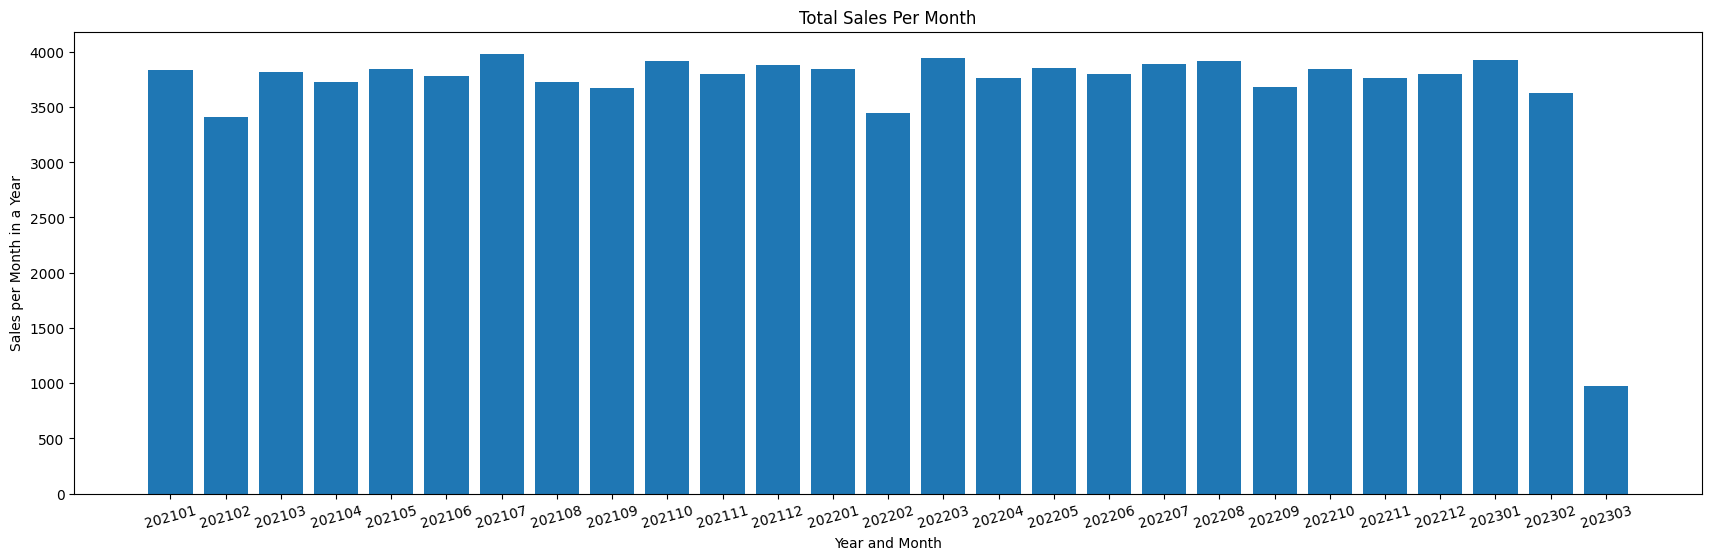

In [23]:
plt.subplots(figsize = (21,6))

plt.xlabel('Year and Month')
plt.ylabel('Sales per Month in a Year')
plt.title('Total Sales Per Month')
plt.xticks(rotation = 15)

plt.bar(sales_per_month.index.astype('str'), sales_per_month.values)
plt.show()

Based on the analysis of total sales per month, July 2021 (202107) recorded the highest sales, with a total of 3984 sales.

# 4. Customer and Product Analysis

## Customer Demographics Analysis

## Analyze purchasing behaviour according to customer's age

In [24]:
age_pb = df.groupby('age')['amount_spent'].count() # age_pb indicates age_purchasing_behaviour
age_pb.head(10)

age
18    1844
19    1936
20    1844
21    1947
22    2051
23    1897
24    1977
25    1863
26    1896
27    1950
Name: amount_spent, dtype: int64

## Visualise based on customer's age purchasing behaviour

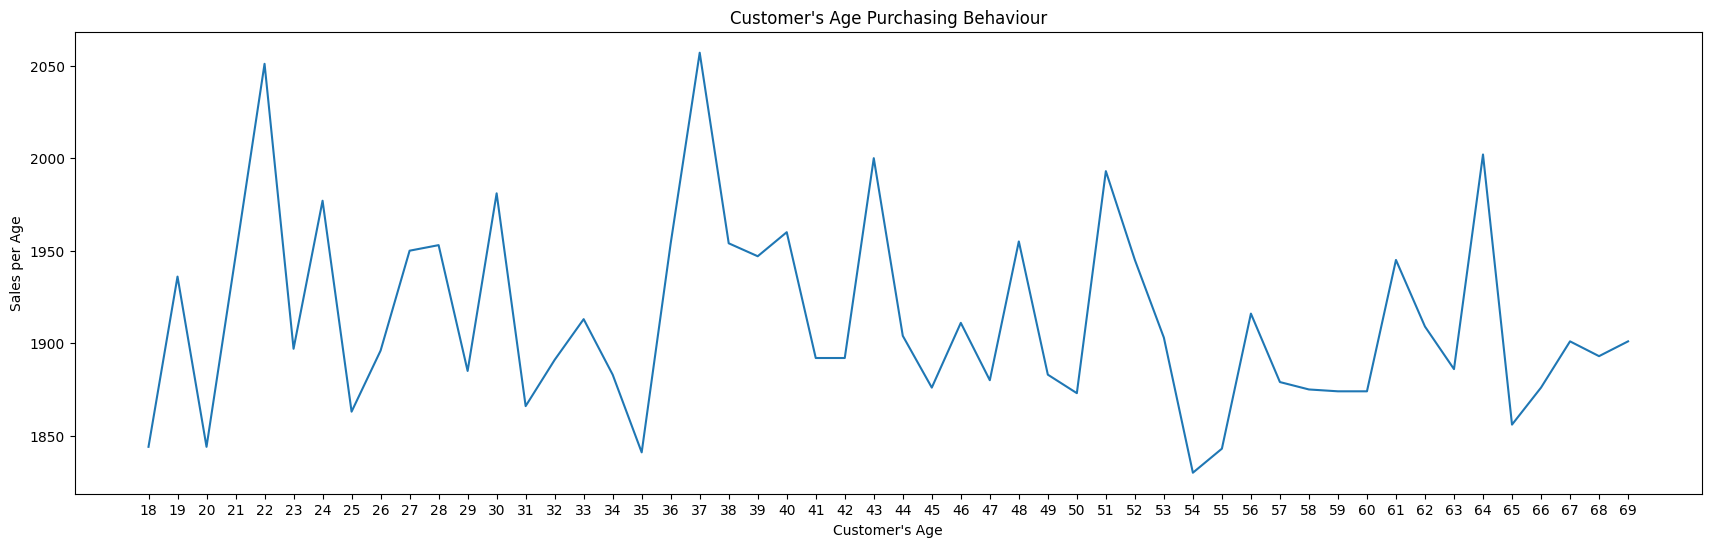

In [25]:
plt.subplots(figsize = (21,6))

plt.xlabel("Customer's Age")
plt.ylabel('Sales per Age')
plt.title("Customer's Age Purchasing Behaviour")

plt.plot(age_pb.index.astype('str'), age_pb.values)
plt.show()

Based on the analysis of customer's age purchasing behaviour, age 37 recorded the highest number of sales, with a total of 2057 sales.

## Analyze purchasing behaviour according to customer's gender

In [26]:
gender_pb = df.groupby('gender')['amount_spent'].size() # gender_pb indicates gender purchasing behaviour
gender_pb

gender
Female    59482
Male      39975
Name: amount_spent, dtype: int64

## Visualise based on customer's gender purchasing behaviour

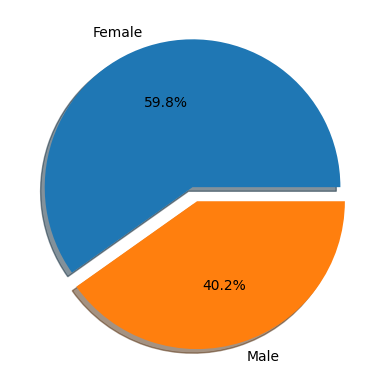

In [27]:
gender = ['Female', 'Male']
values = gender_pb.values

plt.pie(values, labels = gender, shadow = True, explode = (0.05, 0.05), autopct = '%1.1f%%')
plt.show()

Based on the analysis of customer's gender purchasing behavior, Female customers accounted for 59,482 purchases (59.2%), while Male customers made 39,975 purchases (40.8%).

## Purchasing Behavior Analysis

## Analyze the most frequent purchased product by customers

In [28]:
total_products = df.groupby('category')['quantity'].sum()
total_products

category
Books               14982
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Shoes               30217
Souvenir            14871
Technology          15021
Toys                30321
Name: quantity, dtype: int64

## Visualise the total purchased products 

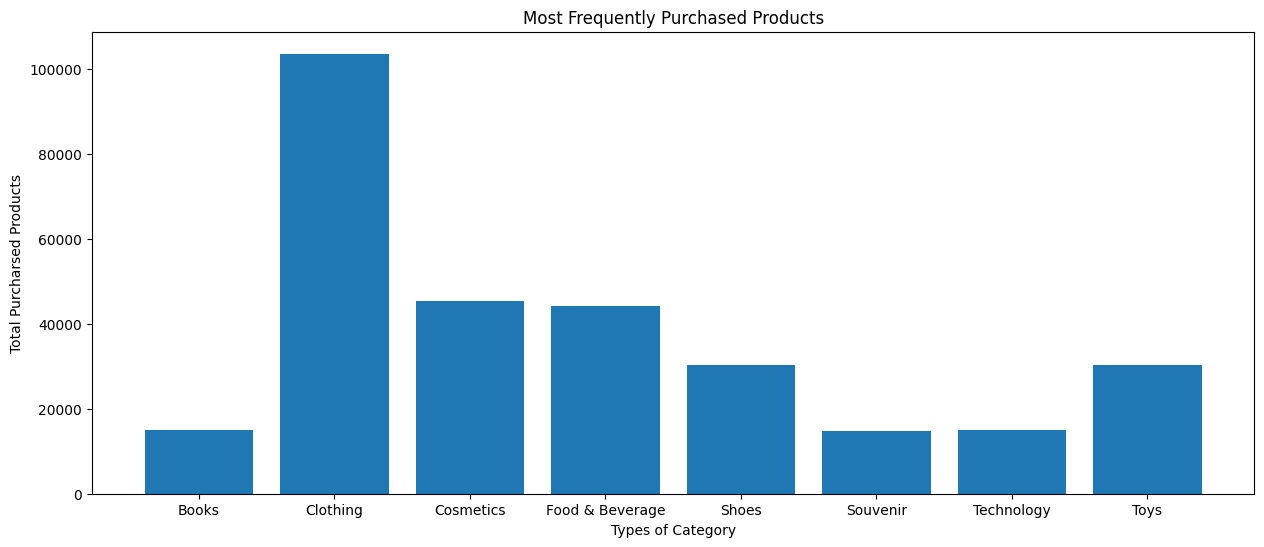

In [34]:
plt.subplots(figsize = (15, 6))

plt.xlabel('Types of Category')
plt.ylabel('Total Purcharsed Products')
plt.title('Most Frequently Purchased Products')

plt.bar(total_products.index, total_products.values)
plt.show()

Based on the analysis of most purchased products, the Clothing category recorded the highest number of purchases, with a total of 103,558 products sold.

## Analyze how choice of payment method affects the total amount spent

In [30]:
payment_method = df.groupby('payment_method')['price'].sum()
payment_method

payment_method
Cash           30705030.98
Credit Card    24051476.93
Debit Card     13794858.00
Name: price, dtype: float64

## Visualise how choice of payment method affects the total amount spent

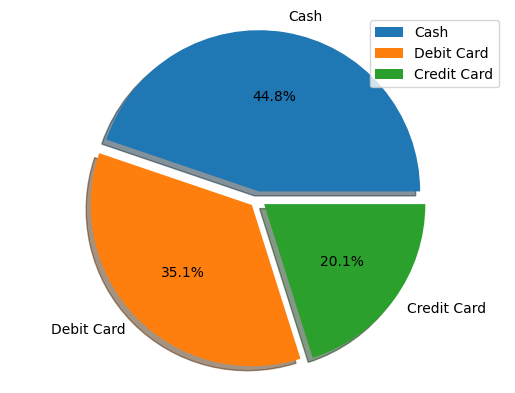

In [31]:
types = ['Cash','Debit Card','Credit Card']
values = payment_method.values

plt.pie(values, labels = types, shadow = True, explode = (0.05, 0.05, 0.05), autopct = '%1.1f%%')
plt.legend()
plt.axis('equal')

plt.show()

Based on the analysis of payment methods, 
Cash accounted for 44.8% of the total amount spent with a total of 30,705,030. 
Debit Card contributed 35.1% of the spending, amounting to 13,794,858 and 
Credit Card represented 20.1% of the total, with 24,051,476 spent.

## Check the correlation between numerical variables in the dataframe

In [32]:
numerical_columns = ['age','quantity','price']

correlation_matrix = df[numerical_columns].corr()
correlation_matrix

,age,quantity,price
age,1.000000,0.000667,0.001694
quantity,0.000667,1.000000,0.344880
price,0.001694,0.344880,1.000000


## Visualize the correlation between numerical variables

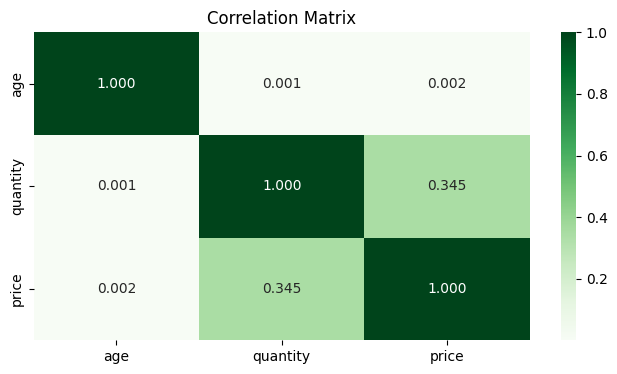

In [33]:
plt.subplots(figsize = (8, 4))

plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot = True, cmap = "Greens", fmt = '.3f')
plt.show()

# 5. Actionable Recommendations

## 1) Targeting High-Performing Customer Segments

Upon analyzing customer demographics, it was observed that the age group of 37 contributed the highest sales across categories. Gender analysis also revealed that a significant number of female customers are making purchases in categories like "Clothing" and "Cosmetics".


## Action 
Create personalized offers for specific age groups such as a special discount for customers aged 37 or gender-based promotions targeting females for clothing or cosmetics. Additionally, targeted advertising campaigns should be employed to reach these segments effectively.

## 2) Optimizing Payment Methods

Payment method analysis indicated that Cash and Debit Cards were frequently used in high-value transactions. Credit cards also showed a noticeable pattern of higher spending, especially among younger customers.

## Action 
Offer tailored discounts or incentives for customers who choose specific payment methods, such as offering loyalty points or discounts for those paying with Debit or Credit Cards. For customers paying with Cash, consider loyalty rewards to encourage repeat purchases.

## 3) Focusing on Top-Selling Products

Based on the sales data, Clothing emerged as the most frequently purchased product category. High revenue was also observed in the Cosmetics and Food & Beverage categories.

## Action 
Increase stock of high-demand products like clothing, shoes, and tech gadgets. Additionally, launch cross-selling opportunities such as bundle deals like buy clothing and get a discount on cosmetics or create targeted promotions like a discount on clothing during seasonal sales.